## Imports

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=17675e3f6ebef6df038005b722ef4b5daf8c33f23afde7b50d1634bd28dd9f2a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree  # This is usually part of SciPy
import pandas as pd

<ipython-input-3-fd321d8ba134>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Data Overview

General Manufacturing Cleaning

In [96]:
general_man_dataframe = pd.read_csv('General_Manufacturing_Facilities.csv')
heart_disease_data = pd.read_csv('Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2018-2020.csv')

<ipython-input-96-b907f5b509c3>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  general_man_dataframe = pd.read_csv('General_Manufacturing_Facilities.csv')


In [97]:
general_man_dataframe.drop(columns=[
                                    'X',
                                    'Y',
                                    'UNIQUE_ID',
                                    'MADDRESS',
                                    'MCITY',
                                    'MSTATE',
                                    'MZIP',
                                    'MZIP4',
                                    'DIRECTIONS',
                                    'ZIP4',
                                    'PHONE',
                                    'FAX',
                                    'ADDRESS',
                                    'ADDRESS2',
                                    'GlobalID',
                                    'FIPS',
                                    'SIC2',
                                    'SIC3',
                                    'SIC4'
                          ],
                          inplace = True
                    )

general_man_dataframe = general_man_dataframe.dropna(subset=['NAME', 'ZIP', 'PRODUCT'])
# manufacture_profile = ProfileReport(general_man_dataframe)
# manufacture_profile

Heart disease cleaning


In [98]:
mask1 = heart_disease_data['GeographicLevel'] == 'County'
heart_disease_data = heart_disease_data[mask1]

heart_disease_data.drop(columns=[
                                    'Year',
                                    'DataSource',
                                    'Data_Value_Type',
                                    'Data_Value_Footnote_Symbol',
                                    'Data_Value_Footnote',
                                    'StratificationCategory1',
                                    'StratificationCategory2',
                                    'TopicID',
                                    'LocationDesc',
                                    'LocationID',
                                    'GeographicLevel'
                          ],
                          inplace = True
                    )

heart_disease_data.rename(columns = {'Stratification1':'Gender', 'Stratification2': 'Ethnicity'}, inplace = True)

mask1 = ~heart_disease_data['LocationAbbr'].isin(['AS', 'MP', 'PR', 'VI', 'GU'])
heart_disease_data['LocationAbbr'] = heart_disease_data['LocationAbbr'][mask1]

mask2 = heart_disease_data['Data_Value'] != 0
heart_disease_data['Data_Value'] = heart_disease_data['Data_Value'][mask2]

heart_disease_data = heart_disease_data.dropna(subset=['LocationAbbr'])

data_value_mean = heart_disease_data['Data_Value'].mean()

heart_disease_data['Data_Value'].fillna(data_value_mean, inplace=True)

state_wise_gender_ratios = pd.read_csv('USA_State_Wise_gender_ratios.csv')

temp_len = len(state_wise_gender_ratios)
state_wise_gender_ratios.loc[temp_len, 'states'] = "GUAM"
state_wise_gender_ratios.loc[temp_len, 'gender_ratios'] = "103.4"
state_wise_gender_ratios.head(5)

state_to_abbreviation = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "GUAM": "GU"
    # Add more states and abbreviations as needed
}


for each_row in range(len(state_wise_gender_ratios)):
  state_wise_gender_ratios.loc[each_row, 'states'] = state_to_abbreviation[
                                                          state_wise_gender_ratios.iloc[each_row]['states']
                                                      ]


heart_disease_data['Male'] = 0
heart_disease_data['Female'] = 0

def update_row(row, ratio_value):

  if row['Gender'] == 'Overall':
    row['Male'] = float(row['Data_Value']) * ((float(ratio_value)/float(2)) / float(100))
    row['Female'] = float(row['Data_Value']) * ((100-(float(ratio_value)/float(2))) / float(100))
  elif row['Gender'] == 'Male':
    row['Male'] = row['Data_Value']
  elif row['Gender'] == 'Female':
    row['Female'] = row['Data_Value']

  return row

# Iterate through the DataFrame row by row and update each row
for index, row in heart_disease_data.iterrows():
  mask1 = state_wise_gender_ratios['states'] == row['LocationAbbr']
  ratio_value = state_wise_gender_ratios[mask1]['gender_ratios'].item()

  updated_row = update_row(row, ratio_value)
  heart_disease_data.loc[index] = updated_row


heart_disease_data['Data_Value_percentage'] = heart_disease_data['Data_Value']/1000


heart_disease_data.drop(columns=[
                                    'Data_Value_Unit'
                          ],
                          inplace = True
                    )



<ipython-input-98-f257cdf5851a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data.drop(columns=[
<ipython-input-98-f257cdf5851a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_data.rename(columns = {'Stratification1':'Gender', 'Stratification2': 'Ethnicity'}, inplace = True)
<ipython-input-98-f257cdf5851a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [99]:
heart_disease_data.head(5)

,LocationAbbr,Class,Topic,Data_Value,Gender,Ethnicity,Y_lat,X_lon,Male,Female,Data_Value_percentage
0,AK,Cardiovascular Diseases,Heart Disease Mortality,182.400000,Overall,Overall,55.442393,-161.959930,100.630080,81.769920,0.18240
1,AK,Cardiovascular Diseases,Heart Disease Mortality,172.600000,Overall,Overall,53.648343,-166.917533,95.223420,77.376580,0.17260
2,AK,Cardiovascular Diseases,Heart Disease Mortality,255.600000,Overall,Overall,61.159145,-149.104559,141.014520,114.585480,0.25560
3,AK,Cardiovascular Diseases,Heart Disease Mortality,343.400000,Overall,Overall,60.923648,-159.753262,189.453780,153.946220,0.34340
4,AK,Cardiovascular Diseases,Heart Disease Mortality,346.730095,Overall,Overall,58.753496,-156.694662,191.290993,155.439102,0.34673


Adding Ethnicity to disease data

In [100]:
ethnicity_ratio = pd.read_csv('state_wise_ethnicity.csv')

In [101]:
ethnicity_ratio.head(5)

,State,White %,Black %,Native American %,Asians %,Hispanic or Latino %,Others %
0,Alabama,0.63,0.26,0.00,0.02,0.05,0.04
1,Alaska,0.58,0.03,0.15,0.06,0.07,0.12
2,Arizona,0.53,0.04,0.04,0.03,0.31,0.04
3,Arkansas,0.69,0.15,0.01,0.02,0.09,0.06
4,California,0.35,0.05,0.00,0.15,0.39,0.05


In [102]:
heart_disease_data['White'] = 0
heart_disease_data['Black'] = 0
heart_disease_data['Native'] = 0
heart_disease_data['hispanic_latino'] = 0
heart_disease_data['Asian'] = 0

In [103]:
for each_row in range(len(ethnicity_ratio)):
  ethnicity_ratio.loc[each_row, 'State'] = state_to_abbreviation[
                                                          ethnicity_ratio.iloc[each_row]['State']
                                                      ]

In [104]:
def update_row_ethnicity(row, white, black, native, hispanic_latino, others):

  if row['Ethnicity'] == 'Overall':
    row['White'] = float(row['Data_Value']) * float(white)
    row['Black'] = float(row['Data_Value']) * float(black)
    row['Native'] = float(row['Data_Value']) * float(native)
    row['hispanic_latino'] = float(row['Data_Value']) * float(hispanic_latino)
    row['Asian'] = float(row['Data_Value']) * float(others)
  elif row['Ethnicity'] == 'White':
    row['White'] = row['Data_Value']
  elif row['Ethnicity'] == 'Black':
    row['Black'] = row['Data_Value']
  elif row['Ethnicity'] == 'Hispanic':
    row['hispanic_latino'] = row['Data_Value']
  elif row['Ethnicity'] == 'Asian and Pacific Islander':
    row['Asian'] = row['Data_Value']
  elif row['Ethnicity'] == 'American Indian and Alaskan Native':
    row['Native'] = row['Data_Value']


  return row

# Iterate through the DataFrame row by row and update each row
for index, row in heart_disease_data.iterrows():
  mask1 = ethnicity_ratio['State'] == row['LocationAbbr']

  white = ethnicity_ratio[mask1]['White %'].item()
  black = ethnicity_ratio[mask1]['Black %'].item()
  native = ethnicity_ratio[mask1]['Native American %'].item()
  hispanic_latino = ethnicity_ratio[mask1]['Hispanic or Latino %'].item()
  others = ethnicity_ratio[mask1]['Asians %'].item()

  updated_row = update_row_ethnicity(row, white, black, native, hispanic_latino, others)
  heart_disease_data.loc[index] = updated_row

In [105]:
heart_disease_data.drop(columns=[
                                  'Gender',
                                  'Ethnicity'
                        ],
                        inplace = True
                  )

In [106]:
heart_disease_data.head(5)

,LocationAbbr,Class,Topic,Data_Value,Y_lat,X_lon,Male,Female,Data_Value_percentage,White,Black,Native,hispanic_latino,Asian
0,AK,Cardiovascular Diseases,Heart Disease Mortality,182.400000,55.442393,-161.959930,100.630080,81.769920,0.18240,105.792000,5.472000,27.360000,12.768000,10.944000
1,AK,Cardiovascular Diseases,Heart Disease Mortality,172.600000,53.648343,-166.917533,95.223420,77.376580,0.17260,100.108000,5.178000,25.890000,12.082000,10.356000
2,AK,Cardiovascular Diseases,Heart Disease Mortality,255.600000,61.159145,-149.104559,141.014520,114.585480,0.25560,148.248000,7.668000,38.340000,17.892000,15.336000
3,AK,Cardiovascular Diseases,Heart Disease Mortality,343.400000,60.923648,-159.753262,189.453780,153.946220,0.34340,199.172000,10.302000,51.510000,24.038000,20.604000
4,AK,Cardiovascular Diseases,Heart Disease Mortality,346.730095,58.753496,-156.694662,191.290993,155.439102,0.34673,201.103455,10.401903,52.009514,24.271107,20.803806


In [107]:
general_man_dataframe.head(20)
general_man_dataframe[general_man_dataframe['STATE'] == 'WI']


,OBJECTID,NAME,CITY,STATE,ZIP,COUNTY,GEOPREC,EMP,PRODUCT,SIC,NAICS,NAICSDESCR,WEB,LONGITUDE,LATITUDE
28159,28160,"DUREX PRODUCTS, INC.",SAINT CROIX FALLS,WI,54024.0,POLK,BLOCKFACE,72.0,"MINING EQUIPMENT, AGGREGATE WEAR PARTS & SIZIN...",3089.0,333131.0,MINING MACHINERY AND EQUIPMENT MANUFACTURING,WWW.DUREXPRODUCTS.COM,-92.628450,45.400522
28160,28161,"QUALITY POWDER COATINGS, INC.",AMERY,WI,54001.0,POLK,BLOCKFACE,16.0,POWDER COATINGS,3399.0,325510.0,PAINT AND COATING MANUFACTURING,NOT AVAILABLE,-92.368181,45.287333
28161,28162,"WILD RIVER DUCTS, INC.",PRAIRIE FARM,WI,54762.0,BARRON,BLOCKFACE,50.0,SHEET-METAL FABRICATION,3444.0,332322.0,SHEET METAL WORK MANUFACTURING,WWW.MIDWESTDUCTS.COM,-91.986040,45.227559
28162,28163,"FEDERAL FOAM TECHNOLOGIES, INC.",NEW RICHMOND,WI,54017.0,ST CROIX,BLOCKFACE,200.0,CORPORATE HEADQUARTERS & CUSTOM FOAM FABRICATI...,3086.0,326140.0,POLYSTYRENE FOAM PRODUCT MANUFACTURING,WWW.FEDERALFOAM.COM,-92.541510,45.105641
28163,28164,"NORTHERN MFG. CO., INC.",GRANTSBURG,WI,54840.0,BURNETT,BLOCKFACE,40.0,WOODEN INTERIOR SHUTTERS,2431.0,321918.0,OTHER MILLWORK (INCLUDING FLOORING ),NOT AVAILABLE,-92.684564,45.785722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156645,156647,"PROCESSED METALS INNOVATORS, LLC",BLOOMER,WI,54724.0,CHIPPEWA,BLOCKFACE,75.0,"METAL STAMPINGS, METAL BLANKING, METAL SLITTIN...",3469.0,NaN,NOT AVAILABLE,WWW.PMILLC.COM,-91.480465,45.094997
156646,156648,HIGHLINE CORP.,HURLEY,WI,54534.0,IRON,BLOCKFACE,25.0,CONTRACT ASSEMBLY & PACKAGING,3999.0,334418.0,PRINTED CIRCUIT ASSEMBLY (ELECTRONIC ASSEMBLY)...,WWW.HIGHLINECORP.ORG,-90.201961,46.442700
156647,156649,"HURD MILLWORK CO., INC.",MERRILL,WI,54452.0,LINCOLN,BLOCKFACE,60.0,INSULATED GLASS UNITS,3231.0,327212.0,OTHER PRESSED AND BLOWN GLASS AND GLASSWARE MA...,WWW.HURD.COM,-89.724664,45.177600
156648,156650,"RITESCREEN CO., INC., THE",MERRILL,WI,54452.0,LINCOLN,BLOCKFACE,50.0,COMMERCIAL FIBERGLASS DOOR & WINDOW SCREENS,3442.0,332321.0,METAL WINDOW AND DOOR MANUFACTURING,WWW.RITESCREEN.COM,-89.708275,45.171236


In [108]:

mask1 = general_man_dataframe['STATE'] == 'AK'
general_man_dataframe[mask1]

,OBJECTID,NAME,CITY,STATE,ZIP,COUNTY,GEOPREC,EMP,PRODUCT,SIC,NAICS,NAICSDESCR,WEB,LONGITUDE,LATITUDE
5,6,"SIGNCO, INC.",ANCHORAGE,AK,99501.0,ANCHORAGE,BLOCKFACE,20.0,"ELECTRIC, METAL & PLASTIC SIGNS, VINYL AWNINGS...",3993.0,339950.0,SIGN MANUFACTURING,WWW.SIGNCOALASKA.COM,-149.828405,61.222884
6,7,"AT PUBLISHING & PRINTING, INC.",ANCHORAGE,AK,99507.0,ANCHORAGE,BLOCKFACE,30.0,"NEWSPAPER, MAGAZINE & BOOK PRINTING & BINDING",2711.0,323119.0,OTHER COMMERCIAL PRINTING,NOT AVAILABLE,-149.848632,61.142892
7,8,"ACTION SECURITY, INC.",ANCHORAGE,AK,99507.0,ANCHORAGE,BLOCKFACE,50.0,"HOLLOW METAL DOORS, DOOR FRAME ASSEMBLY, LOCKS...",3442.0,332321.0,METAL WINDOW AND DOOR MANUFACTURING,WWW.ACTIONSECURITY.COM,-149.837958,61.146881
8,9,"UNISEA, INC.",UNALASKA,AK,99685.0,ALEUTIANS WEST,BLOCKFACE,1300.0,SEAFOOD PROCESSING,2092.0,311712.0,FRESH AND FROZEN SEAFOOD PROCESSING,WWW.UNISEA.COM,-166.551770,53.879511
9,10,"WELDING SHOP, THE",FAIRBANKS,AK,99712.0,FAIRBANKS NORTH STAR,BLOCKFACE,20.0,METAL FABRICATION & WELDING JOB SHOP,3599.0,332710.0,MACHINE SHOPS,NOT AVAILABLE,-147.578846,64.968285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,PEAK OILFIELD SERVICE CO.,PRUDHOE BAY,AK,99734.0,NORTH SLOPE,BLOCKFACE,200.0,OIL & GAS FIELD EQUIPMENT & WELDING JOB SHOP,3533.0,333132.0,OIL AND GAS FIELD MACHINERY AND EQUIPMENT MANU...,WWW.PEAKALASKA.COM,-148.386339,70.233153
219,220,"KLONDIKE CONCRETE CO., INC.",CHUGIAK,AK,99567.0,ANCHORAGE,BLOCKFACE,50.0,READY-MIXED CONCRETE,3273.0,327320.0,READY-MIX CONCRETE MANUFACTURING,NOT AVAILABLE,-149.498749,61.379713
220,221,"H & K SHEET METAL FABRICATORS, INC.",ANCHORAGE,AK,99518.0,ANCHORAGE,BLOCKFACE,30.0,SHEET METAL FABRICATION,3444.0,NaN,NOT AVAILABLE,WWW.HKSHEETMETALFAB.COM,-149.895242,61.161822
221,222,"COPPER RIVER SEAFOODS, INC.",ANCHORAGE,AK,99501.0,ANCHORAGE,BLOCKFACE,30.0,SEAFOOD PROCESSING,2092.0,311712.0,FRESH AND FROZEN SEAFOOD PROCESSING,WWW.COPPERRIVERSEAFOODS.COM,-149.856694,61.221206


Classification

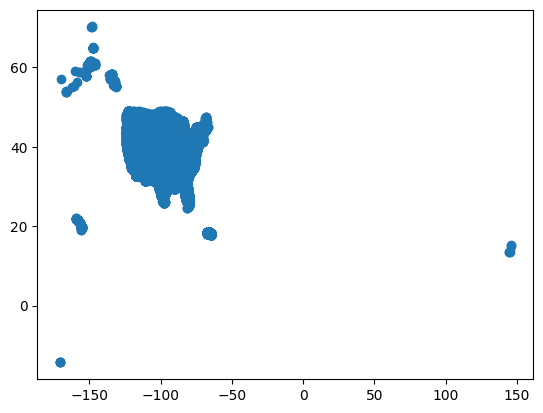

In [109]:
import matplotlib.pyplot as plt
plt.scatter(x=general_man_dataframe['LONGITUDE'], y=general_man_dataframe['LATITUDE'])
plt.show()

In [110]:
len(heart_disease_data)

56556

In [111]:
len(general_man_dataframe)

162178

In [112]:
import geopy.distance

coords_1 = (52, 21)
coords_2 = (52, 22)

print(geopy.distance.geodesic(coords_1, coords_2).km)

68.67747478989759


In [113]:
thresholds = [20, 30, 40, 50]

In [114]:
man_location = general_man_dataframe[['LATITUDE', 'LONGITUDE']].values.tolist()
disease_location = heart_disease_data[['Y_lat', 'X_lon']].values.tolist()

In [115]:
general_man_dataframe['number_of_influence'] = 0

In [116]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

counts = []

# Convert latitude and longitude to radians for both DataFrames
general_man_dataframe['latitude_rad'] = np.radians(general_man_dataframe['LATITUDE'])
general_man_dataframe['longitude_rad'] = np.radians(general_man_dataframe['LONGITUDE'])

heart_disease_data['latitude_rad'] = np.radians(heart_disease_data['Y_lat'])
heart_disease_data['longitude_rad'] = np.radians(heart_disease_data['X_lon'])

# Create a KD-Tree for the large DataFrame
tree_small = cKDTree(heart_disease_data[['latitude_rad', 'longitude_rad']].values)

# Create a dictionary to store counts
counts_dict = {}

threshold_distance_rad = 40 / 6371.0  # Earth's radius in km

# For each row in the small DataFrame, query the KD-Tree
for _, row in general_man_dataframe.iterrows():
    query_point = np.array([row['latitude_rad'], row['longitude_rad']])

    # Query the KD-Tree for points within the threshold distance
    indices = tree_small.query_ball_point(query_point, threshold_distance_rad)

    # Count the matched points
    count = len(indices)
    counts.append(count)

# Add the counts as a new column to the large DataFrame
general_man_dataframe['number_of_influence'] = counts

# Print or further process the large DataFrame with the added column
print(general_man_dataframe)


        OBJECTID                                  NAME          CITY STATE  \
0              1         HAWAIIAN ROCK PRODUCTS - GUAM      MANGILAO    GU   
1              2                         GUAM SHIPYARD    SANTA RITA    GU   
2              3  JWS REFRIGERATION & AIR CONDITIONING      TAMUNING    GU   
3              4                           CHONGS CORP        SAIPAN    MP   
4              5         HAWAIIAN ROCK PRODUCTS SAIPAN        SAIPAN    MP   
...          ...                                   ...           ...   ...   
162173    162175                    POOLE BROS. LUMBER  DAMARISCOTTA    ME   
162174    162176                  UNIQUE MACHINE, INC.   SOUTH CASCO    ME   
162175    162177             UNITED PUBLICATIONS, INC.      YARMOUTH    ME   
162176    162178        VALLEY VIEW ORCHARD PIES, INC.        HEBRON    ME   
162177    162179      VAN ECK-TILLMAN ADVISORIES, INC.         CASCO    ME   

            ZIP      COUNTY    GEOPREC   EMP  \
0       96913.0

In [117]:
x = pd.DataFrame(general_man_dataframe)

In [118]:
x['number_of_influence'].unique()

array([  0,  18,  54,  36,  72,  90, 108, 126, 144, 162, 180, 198, 216])

In [119]:
x

,OBJECTID,NAME,CITY,STATE,ZIP,COUNTY,GEOPREC,EMP,PRODUCT,SIC,NAICS,NAICSDESCR,WEB,LONGITUDE,LATITUDE,number_of_influence,latitude_rad,longitude_rad
0,1,HAWAIIAN ROCK PRODUCTS - GUAM,MANGILAO,GU,96913.0,GUAM,BLOCKFACE,0.0,"READY MIXED CONCRETE, CONCRETE MASONRY BLOCKS,...",2951.0,324121.0,ASPHALT PAVING MIXTURE AND BLOCK MANUFACTURING,WWW.HAWAIIANROCK.COM,144.835428,13.462436,0,0.234964,2.527855
1,2,GUAM SHIPYARD,SANTA RITA,GU,96915.0,GUAM,BLOCKFACE,0.0,SHIP REPAIR AND METAL FABRICATION JOBSHOP,3731.0,NaN,NOT AVAILABLE,WWW.GUAMSHIPYARD.NET,144.658118,13.442247,0,0.234611,2.524760
2,3,JWS REFRIGERATION & AIR CONDITIONING,TAMUNING,GU,96913.0,GUAM,BLOCKFACE,0.0,REFRIGERATION AND AIR-CONDITIONING,3585.0,NaN,NOT AVAILABLE,WWW.JWSGUAM.COM,144.788307,13.491229,0,0.235466,2.527033
3,4,CHONGS CORP,SAIPAN,MP,96950.0,SAIPAN,BLOCKFACE,0.0,AIR-CONDITIONING AND HEATING EQUIPMENT,3585.0,NaN,NOT AVAILABLE,NOT AVAILABLE,145.720263,15.192528,0,0.265160,2.543298
4,5,HAWAIIAN ROCK PRODUCTS SAIPAN,SAIPAN,MP,96950.0,SAIPAN,BLOCKFACE,0.0,ASPHALT PAVING MIXTURES AND BLOCKS,2951.0,324121.0,ASPHALT PAVING MIXTURE AND BLOCK MANUFACTURING,NOT AVAILABLE,145.748455,15.116804,0,0.263838,2.543790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162173,162175,POOLE BROS. LUMBER,DAMARISCOTTA,ME,4543.0,LINCOLN,BLOCKFACE,20.0,LUMBER PROCESSING,2421.0,NaN,NOT AVAILABLE,WWW.POOLEBROTHERSLUMBER.COM,-69.510811,44.038356,54,0.768614,-1.213193
162174,162176,"UNIQUE MACHINE, INC.",SOUTH CASCO,ME,4077.0,CUMBERLAND,BLOCKFACE,25.0,PRECISION MACHINING JOB SHOP,3599.0,332710.0,MACHINE SHOPS,NOT AVAILABLE,-70.527249,43.922994,18,0.766601,-1.230933
162175,162177,"UNITED PUBLICATIONS, INC.",YARMOUTH,ME,4096.0,CUMBERLAND,BLOCKFACE,30.0,MONTHLY TRADE NEWSPAPER PUBLISHING,2711.0,NaN,NOT AVAILABLE,WWW.HMENEWS.COM,-70.176389,43.795322,18,0.764373,-1.224809
162176,162178,"VALLEY VIEW ORCHARD PIES, INC.",HEBRON,ME,4238.0,OXFORD,BLOCKFACE,20.0,"FRUIT PIES, INCLUDING APPLE, BLUEBERRY & RHUBARB",2053.0,311813.0,"FROZEN CAKES, PIES, AND OTHER PASTRIES MANUFAC...",WWW.VALLEYVIEWORCHARDPIES.COM,-70.379932,44.211597,36,0.771638,-1.228362


In [25]:
general_man_dataframe = pd.read_csv('general_man_dataframe.csv', sep='\t')
heart_disease_data = pd.read_csv('heart_disease_data.csv', sep='\t')

In [34]:
general_man_dataframe.dropna(inplace = True)

In [26]:
general_man_dataframe['GEOPREC'].unique()

array(['BLOCKFACE', 'ONENTITY'], dtype=object)

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [35]:
general_man_dataframe['STATE'] = general_man_dataframe['STATE'].astype("category")
general_man_dataframe['SIC'] = general_man_dataframe['SIC'].astype("category")
general_man_dataframe['GEOPREC'] = general_man_dataframe['GEOPREC'].astype("category")

In [11]:
# mask1 = general_man_dataframe['GEOPREC'] == 'BLOCKFACE'
# general_man_dataframe.loc[mask1, 'GEOPREC'] = 1

# mask2 = general_man_dataframe['GEOPREC'] == 'ONENTITY'
# general_man_dataframe.loc[mask2, 'GEOPREC'] = 0

# general_man_dataframe['GEOPREC'] = general_man_dataframe['GEOPREC'].astype("category")

In [36]:
general_man_dataframe['GEOPREC'].unique()

['BLOCKFACE', 'ONENTITY']
Categories (2, object): ['BLOCKFACE', 'ONENTITY']

In [47]:
general_man_dataframe['number_of_influence'] = pd.cut(general_man_dataframe['number_of_influence'], bins=5, labels=False) + 1

In [48]:
feature_cols = ['SIC', 'GEOPREC', 'STATE']
X = general_man_dataframe[feature_cols] # Features
y = general_man_dataframe['number_of_influence'] # Target variable

In [49]:
y

0         1
4         1
5         1
6         1
7         1
         ..
162170    1
162171    1
162172    1
162174    1
162176    1
Name: number_of_influence, Length: 138729, dtype: int64

In [50]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train_encoded = pd.get_dummies(X_train)

In [51]:
X_test_encoded = pd.get_dummies(X_test)

In [52]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_encoded, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_encoded)


In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6831735505418198


In [18]:
general_man_dataframe = pd.read_csv('general_man_dataframe.csv', sep='\t')
heart_disease_data = pd.read_csv('heart_disease_data.csv', sep='\t')

In [19]:
general_man_dataframe

,Unnamed: 0,OBJECTID,NAME,CITY,STATE,ZIP,COUNTY,GEOPREC,EMP,PRODUCT,SIC,NAICS,NAICSDESCR,WEB,LONGITUDE,LATITUDE,number_of_influence,latitude_rad,longitude_rad
0,0,1,HAWAIIAN ROCK PRODUCTS - GUAM,MANGILAO,GU,96913.0,GUAM,BLOCKFACE,0.0,"READY MIXED CONCRETE, CONCRETE MASONRY BLOCKS,...",2951.0,324121.0,ASPHALT PAVING MIXTURE AND BLOCK MANUFACTURING,WWW.HAWAIIANROCK.COM,144.835428,13.462436,0,0.234964,2.527855
1,1,2,GUAM SHIPYARD,SANTA RITA,GU,96915.0,GUAM,BLOCKFACE,0.0,SHIP REPAIR AND METAL FABRICATION JOBSHOP,3731.0,NaN,NOT AVAILABLE,WWW.GUAMSHIPYARD.NET,144.658118,13.442247,0,0.234611,2.524760
2,2,3,JWS REFRIGERATION & AIR CONDITIONING,TAMUNING,GU,96913.0,GUAM,BLOCKFACE,0.0,REFRIGERATION AND AIR-CONDITIONING,3585.0,NaN,NOT AVAILABLE,WWW.JWSGUAM.COM,144.788307,13.491229,0,0.235466,2.527033
3,3,4,CHONGS CORP,SAIPAN,MP,96950.0,SAIPAN,BLOCKFACE,0.0,AIR-CONDITIONING AND HEATING EQUIPMENT,3585.0,NaN,NOT AVAILABLE,NOT AVAILABLE,145.720263,15.192528,0,0.265160,2.543298
4,4,5,HAWAIIAN ROCK PRODUCTS SAIPAN,SAIPAN,MP,96950.0,SAIPAN,BLOCKFACE,0.0,ASPHALT PAVING MIXTURES AND BLOCKS,2951.0,324121.0,ASPHALT PAVING MIXTURE AND BLOCK MANUFACTURING,NOT AVAILABLE,145.748455,15.116804,0,0.263838,2.543790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162173,162173,162175,POOLE BROS. LUMBER,DAMARISCOTTA,ME,4543.0,LINCOLN,BLOCKFACE,20.0,LUMBER PROCESSING,2421.0,NaN,NOT AVAILABLE,WWW.POOLEBROTHERSLUMBER.COM,-69.510811,44.038356,54,0.768614,-1.213193
162174,162174,162176,"UNIQUE MACHINE, INC.",SOUTH CASCO,ME,4077.0,CUMBERLAND,BLOCKFACE,25.0,PRECISION MACHINING JOB SHOP,3599.0,332710.0,MACHINE SHOPS,NOT AVAILABLE,-70.527249,43.922994,18,0.766601,-1.230933
162175,162175,162177,"UNITED PUBLICATIONS, INC.",YARMOUTH,ME,4096.0,CUMBERLAND,BLOCKFACE,30.0,MONTHLY TRADE NEWSPAPER PUBLISHING,2711.0,NaN,NOT AVAILABLE,WWW.HMENEWS.COM,-70.176389,43.795322,18,0.764373,-1.224809
162176,162176,162178,"VALLEY VIEW ORCHARD PIES, INC.",HEBRON,ME,4238.0,OXFORD,BLOCKFACE,20.0,"FRUIT PIES, INCLUDING APPLE, BLUEBERRY & RHUBARB",2053.0,311813.0,"FROZEN CAKES, PIES, AND OTHER PASTRIES MANUFAC...",WWW.VALLEYVIEWORCHARDPIES.COM,-70.379932,44.211597,36,0.771638,-1.228362


In [21]:
general_man_dataframe[general_man_dataframe['GEOPREC'] == 'BLOCKFACE']['number_of_influence'].sum()

7407108

In [22]:
general_man_dataframe[general_man_dataframe['GEOPREC'] == 'ONENTITY']['number_of_influence'].sum()

137646

In [23]:
general_man_dataframe[general_man_dataframe['GEOPREC'] == 'BLOCKFACE'].describe()

,Unnamed: 0,OBJECTID,ZIP,EMP,SIC,NAICS,LONGITUDE,LATITUDE,number_of_influence,latitude_rad,longitude_rad
count,159077.000000,159077.000000,159077.000000,159077.000000,158954.000000,136423.000000,159077.000000,159077.000000,159077.000000,159077.000000,159077.000000
mean,81084.419338,81085.637685,49085.491938,98.340433,3115.046378,327391.514158,-90.267064,38.335549,46.563036,0.669082,-1.575457
std,46912.914933,46913.210354,28018.020779,286.196119,547.248511,17163.177625,15.025627,5.032458,34.756282,0.087833,0.262247
min,0.000000,1.000000,601.000000,0.000000,2011.000000,33641.000000,-170.721822,-14.322119,0.000000,-0.249968,-2.979658
25%,40330.000000,40331.000000,28110.000000,21.000000,2711.000000,323119.000000,-95.770218,34.433220,18.000000,0.600973,-1.671506
50%,81273.000000,81274.000000,47918.000000,40.000000,3275.000000,331511.000000,-86.348928,39.763130,36.000000,0.693998,-1.507073
75%,121686.000000,121687.000000,73112.000000,85.000000,3559.000000,333912.000000,-80.202298,41.893420,54.000000,0.731178,-1.399794
max,162177.000000,162179.000000,99929.000000,20500.000000,3999.000000,339999.000000,145.748455,70.257951,216.000000,1.226233,2.543790


In [24]:
general_man_dataframe